# **Mô hình dự đoán GIÁ VÀNG bằng mạng LSTM**
Dữ liệu lấy từ năm 2017-2022


**Import thư viện, công cụ cần thiết**

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
from sklearn.preprocessing import MinMaxScaler
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers import Dropout



# CHUẨN BỊ DỮ LIỆU

**1- Chuẩn bị dataset**

In [40]:
dir_path = 'D:\CTU\DeepLearning\B2017091_NguyenMinhTuan_Project_2\Dataset\daily_data.xlsx'
df = pd.read_excel(dir_path, index_col='Date', parse_dates=True)


In [41]:
# Lấy dữ liệu ở cột "P" => Cột Price: giá cả
data = df[['P']] 

# In thử 5 dòng đầu
data.head() 

,P
Date,
2017-01-03,3638000
2017-01-04,3645000
2017-01-05,3665000
2017-01-06,3650000
2017-01-07,3660000


**2- Chuẩn hóa dữ liệu**
- `MinMaxScaler` là một công cụ trong sklearn để chuẩn hóa dữ liệu. Chuẩn hóa dữ liệu là quá trình biến đổi các giá trị của biến thành một phạm vi nhất định, thường là từ 0 đến 1 hoặc -1 đến 1.  
- Trong trường hợp này, `feature_range=(0, 1)` chỉ định phạm vi mà bạn muốn dữ liệu của mình được chuẩn hóa thành. Trong trường hợp này, dữ liệu được chuyển đổi sao cho giá trị nhỏ nhất trở thành 0 và giá trị lớn nhất trở thành 1.
- `fit_transform()` là một phương thức trong MinMaxScaler để tính toán các tham số cần thiết từ dữ liệu và sau đó chuẩn hóa dữ liệu dựa trên các tham số này.

In [42]:
scaler = MinMaxScaler(feature_range=(0, 1))
data   = scaler.fit_transform(data)

**3- Tách tập dữ liệu:**


Tập train và validation

In [43]:
# PHÂN CHIA DỮ LIỆU TRAIN, VALIDATION

test_len  = 180
train_len = data.shape[0] - test_len
timesteps = 60
features  = 1

X_train = []
y_train = []

for i in range(timesteps, train_len):
  X_train.append(data[i-timesteps:i, :])
  y_train.append(data[i, :])


X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
print("Kích thước tập train trc khi validated :", X_train.shape, y_train.shape)

val_ratio = 0.2  # Tỷ lệ phần trăm dữ liệu huấn luyện được sử dụng cho tập validation
val_len = int(len(X_train) * val_ratio)

X_val = X_train[-val_len:]
y_val = y_train[-val_len:]

X_train = X_train[:-val_len]
y_train = y_train[:-val_len]

print("validation length: ", val_len)
print("train length: ", train_len)
print("Kích thước tập huấn luyện:", X_train.shape, y_train.shape)
print("Kích thước tập validation:", X_val.shape, y_val.shape)

Kích thước tập train trc khi validated : (1251, 60, 1) (1251, 1)
validation length:  250
train length:  1311
Kích thước tập huấn luyện: (1001, 60, 1) (1001, 1)
Kích thước tập validation: (250, 60, 1) (250, 1)


Tập test:

In [44]:
# PHÂN CHIA DỮ LIỆU TEST
X_test = []
y_test = []

for i in range(train_len, data.shape[0]):
  X_test.append(data[i-timesteps:i, :])
  y_test.append(data[i, :])

X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

print("Kích thước tập kiểm tra:", X_test.shape, y_test.shape)

Kích thước tập kiểm tra: (180, 60, 1) (180, 1)


# **TIẾN HÀNH THỬ NGHIỆM TRÊN CÁC KIẾN TRÚC KHÁC NHAU**

# **MODEL 1**


In [45]:
EPOCHS = 80
BS = 32

In [46]:
model1 = Sequential()

model1.add(LSTM(128, return_sequences=True, input_shape=(timesteps, features)))
model1.add(LSTM(64, return_sequences=False))
model1.add(Dense(30))
model1.add(Dense(1))

model1.compile(optimizer='adam', loss='mse')

model1.summary()

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 60, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 30)             │         1,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,949 (460.74 KB)

 Trainable params: 117,949 (460.74 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
# model1.fit(X_train, y_train, batch_size=BS, epochs=EPOCHS)
history = model1.fit(X_train, y_train, 
                     batch_size=BS, 
                     epochs=EPOCHS, 
                     validation_data=(X_val, y_val))




Epoch 1/80
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0084 - val_loss: 0.0031
Epoch 2/80
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 3.5814e-04 - val_loss: 0.0020
Epoch 3/80
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 3.3090e-04 - val_loss: 0.0019
Epoch 4/80
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 2.6067e-04 - val_loss: 0.0017
Epoch 5/80
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 2.3138e-04 - val_loss: 0.0032
Epoch 6/80
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 2.1423e-04 - val_loss: 0.0027
Epoch 7/80
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 2.3953e-04 - val_loss: 0.0021
Epoch 8/80
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 2.6128e-04 - val_loss: 0.0025
Epoch 9/80
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 2.9177e-04 - val_loss: 0.0012
Epoch 10/80
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 2.2642e-04 - val_loss: 0.0020
Epoch 11/80
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 2.4969e-04 - val_loss: 0.0084
Epoch 12/80
32/32 ━━━━━

In [14]:
from keras.models import save_model

# Lưu mô hình thành file Keras native format
save_model(model1, "model/model1.keras")


In [48]:
# Lấy các giá trị loss và accuracy từ đối tượng history của model1
train_loss = history.history['loss']

# In ra giá trị loss của epoch cuối cùng
print("Final Training Loss:", train_loss[-1])




Final Training Loss: 8.908045856514946e-05


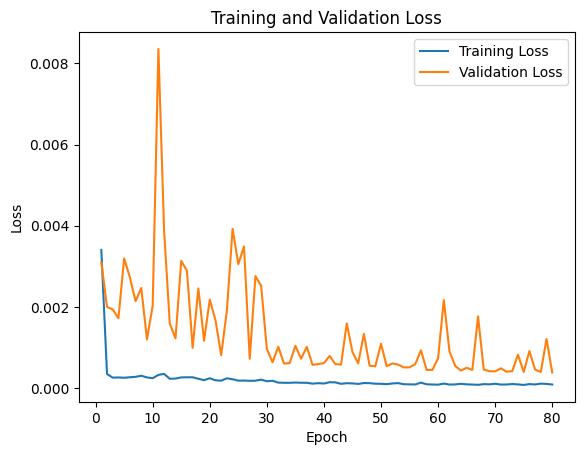

In [49]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']  # Nếu bạn đã sử dụng validation_data trong quá trình huấn luyện

epochs_range = range(1, len(train_loss) + 1)

plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')  # Đồ thị cho loss của tập validation
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


**Kiểm tra trực tiếp trên tập test:**


**Root Mean Squared Error (RMSE)** 
Là một phép đo đánh giá hiệu suất của một mô hình dự đoán, thường được sử dụng trong các bài toán dự đoán và hồi quy. RMSE đo lường độ lớn của sai số giữa giá trị thực tế và giá trị được dự đoán bởi mô hình,

In [50]:
y_pred = model1.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)
rmse = np.sqrt(((y_test - y_pred)**2).mean())
rmse


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step


26943.9002953616

**In ra biểu đồ dự đoán giá**: 
- Đường màu cam là dự đoán
- Đường màu xanh là dữ liệu thực tế

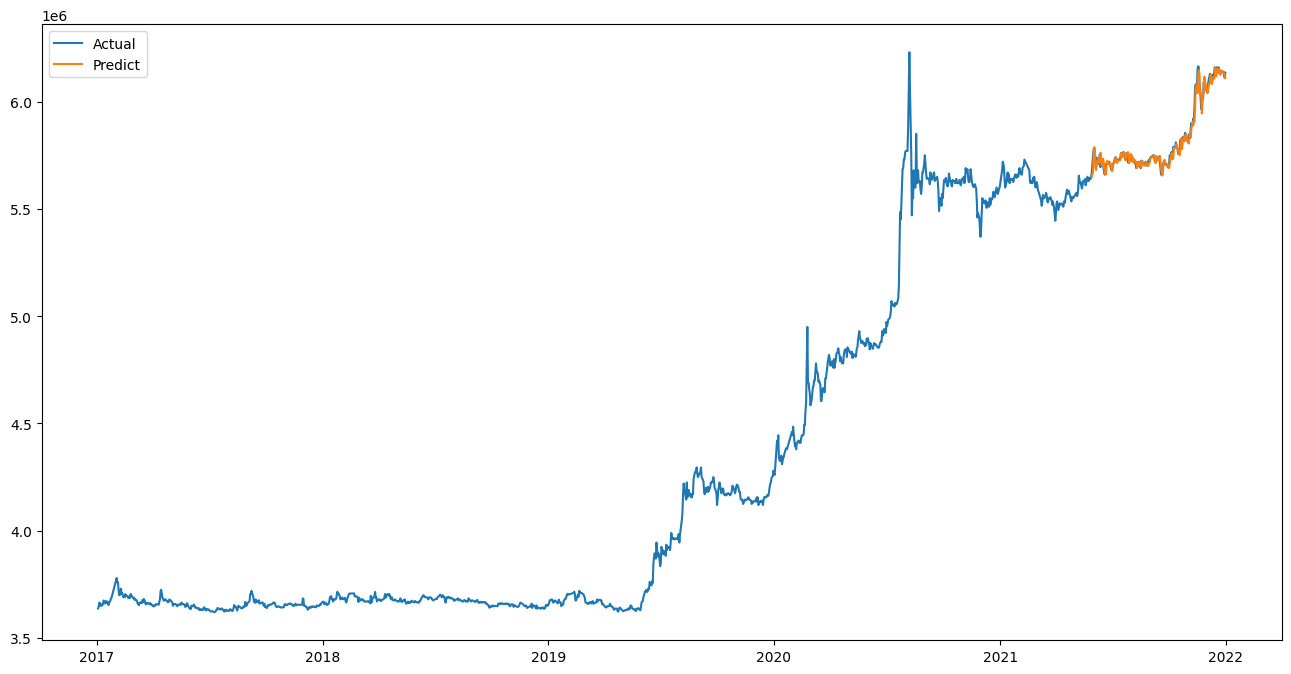

In [51]:
actual = df[['P']]
pred   = df[['P']].iloc[train_len:, :]
pred[['Predict']] = y_pred
plt.figure(figsize=(16, 8))
plt.plot(actual, label='Actual')
plt.plot(pred[['Predict']], label='Predict')
plt.legend()
plt.show()

# **MODEL 2**
Dữ liệu với bộ tham số lớn hơn, tăng số lượng epoch


In [11]:
model2 = Sequential()
model2.add(LSTM(units=256, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model2.add(LSTM(units=128))
model2.add(Dense(units=30))
model2.add(Dense(units=1))

# Compile mô hình
model2.compile(optimizer='adam', loss='mean_squared_error')

model2.summary()

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 60, 256)        │       264,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 128)            │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 30)             │         3,870 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 465,213 (1.77 MB)

 Trainable params: 465,213 (1.77 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
history2 = model2.fit(X_train, y_train, batch_size= BS, epochs= EPOCHS, validation_data=(X_val, y_val) )

Epoch 1/80
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - loss: 0.0092 - val_loss: 0.0022
Epoch 2/80
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - loss: 3.1408e-04 - val_loss: 0.0013
Epoch 3/80
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 2.5246e-04 - val_loss: 0.0017
Epoch 4/80
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - loss: 2.2050e-04 - val_loss: 0.0020
Epoch 5/80
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 2.5065e-04 - val_loss: 0.0038
Epoch 6/80
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 3.5263e-04 - val_loss: 0.0011
Epoch 7/80
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 3.3249e-04 - val_loss: 0.0018
Epoch 8/80
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 3.3999e-04 - val_loss: 0.0013
Epoch 9/80
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 2.1481e-04 - val_loss: 0.0023
Epoch 10/80
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - loss: 3.6471e-04 - val_loss: 0.0016
Epoch 11/80
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 118ms/step - loss: 1.6978e-04 - val_loss: 0.0020
Epoch 12/80
32/32 ━━━━

**Kiểm tra trên tập test**

In [33]:
y2_pred = model2.predict(X_test)
y2_pred = scaler.inverse_transform(y2_pred)
y2_test = scaler.inverse_transform(y_test)
rmse = np.sqrt(((y_test - y2_pred)**2).mean())
rmse

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


5857858.646045142

**Biểu đồ loss của MODEL2**
- Đường màu xanh là của training loss
- Đường màu cam là validation loss

Final Training Loss: 8.926073496695608e-05


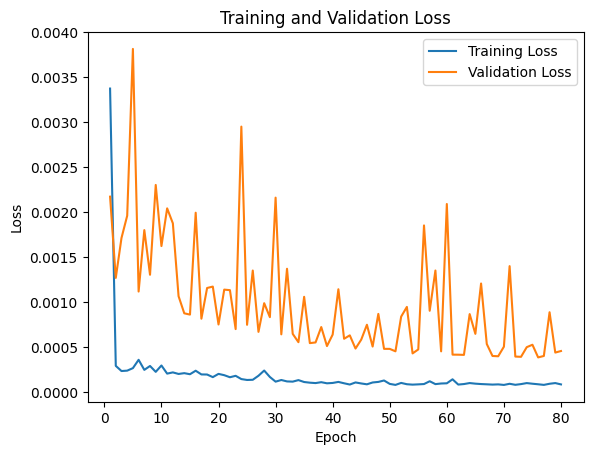

In [26]:
# Lấy các giá trị loss và accuracy từ đối tượng history của model1
train_loss2 = history2.history['loss']

# In ra giá trị loss của epoch cuối cùng
print("Final Training Loss:", train_loss2[-1])

train_loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']  

epochs_range = range(1, len(train_loss2) + 1)

plt.plot(epochs_range, train_loss2, label='Training Loss')
plt.plot(epochs_range, val_loss2, label='Validation Loss')  # Đồ thị cho loss của tập validation
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



**BIỂU ĐỒ DỰ ĐOÁN GIÁ CỦA MODEL2**
- Đường màu xanh là giá trị thực tế
- Đường màu cam là giá trị dữ đoán

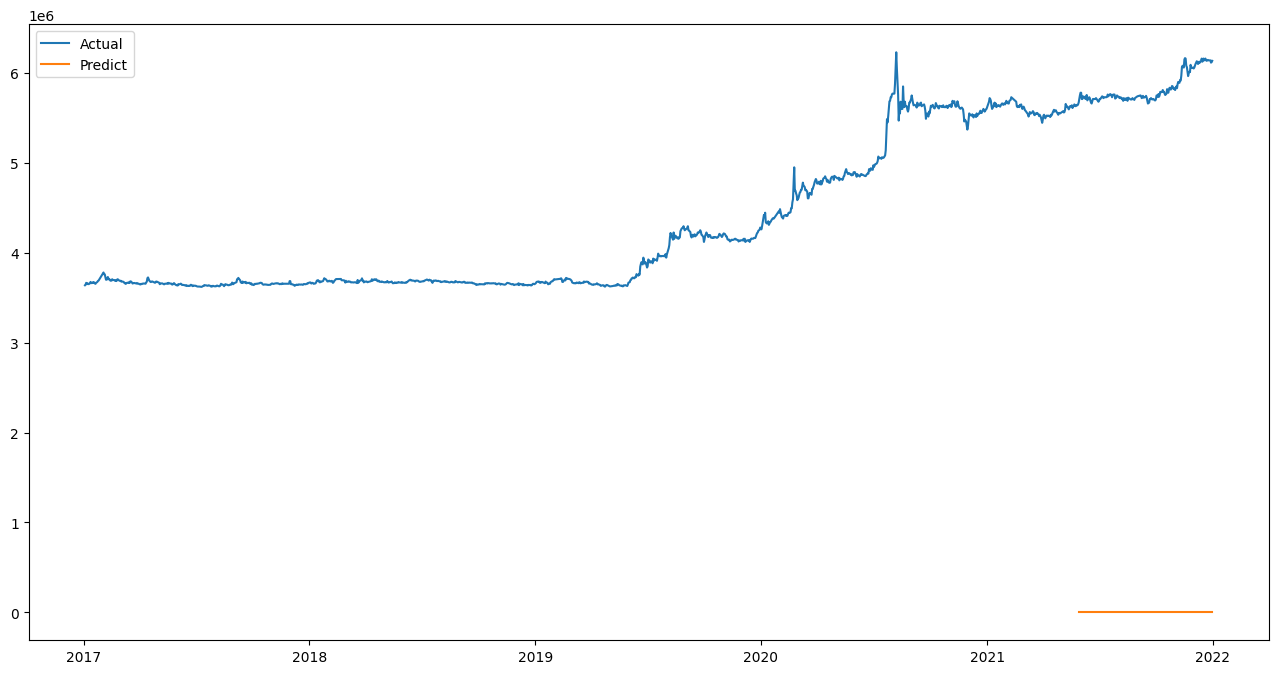

In [27]:
actual = df[['P']]
pred   = df[['P']].iloc[train_len:, :]
pred[['Predict']] = y2_pred
plt.figure(figsize=(16, 8))
plt.plot(actual, label='Actual')
plt.plot(pred[['Predict']], label='Predict')
plt.legend()
plt.show()

**MODEL 3: LẤY LẠI KIẾN TRÚC CỦA MODEL2 NHƯNG ÁP DỤNG EARLY STOPPING**


- `monitor='val_loss'`: Đây là thước đo mà Early Stopping sẽ theo dõi để quyết định khi nào dừng huấn luyện. Trong trường hợp này, chúng ta muốn theo dõi validation loss (`val_loss`). 
- `patience=7`: Đây là số lượng epochs mà chúng ta sẽ chấp nhận không có sự cải thiện trước khi dừng huấn luyện. Nếu không có sự cải thiện trong `patience` epochs liên tiếp, Early Stopping sẽ dừng huấn luyện. Trong trường hợp này, nếu không có sự cải thiện trong validation loss trong 7 epochs liên tiếp, huấn luyện sẽ dừng lại.
- `mode='min'`: Đây là hướng mà chúng ta muốn theo dõi. Trong trường hợp này, chúng ta muốn giảm giá trị của thước đo theo dõi (`monitor`). Do đó, chúng ta đặt `mode='min'`. Nếu chúng ta muốn theo dõi sự tăng của thước đo, chúng ta có thể đặt `mode='max'`.
- `verbose=1`: Tham số này quy định mức độ thông tin xuất ra trong quá trình huấn luyện. Nếu `verbose=1`, thông tin về việc dừng sớm sẽ được in ra mỗi khi Early Stopping được kích hoạt. Nếu `verbose=0`, không có thông tin nào sẽ được in ra.

In [9]:
from keras.callbacks import EarlyStopping

# Khởi tạo Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=7, mode='min', verbose=1)


In [10]:
model3 = Sequential()

model3.add(LSTM(256, return_sequences=True, input_shape=(timesteps, features)))
model3.add(LSTM(158, return_sequences=False))
model3.add(Dense(30))
model3.add(Dense(1))

model3.compile(optimizer='adam', loss='mse')

model3.summary()

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 256)        │       264,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 158)            │       262,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 30)             │         4,770 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 531,273 (2.03 MB)

 Trainable params: 531,273 (2.03 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Huấn luyện mô hình với Early Stopping
history3 = model3.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=80, batch_size=16, callbacks=[early_stopping])


Epoch 1/80
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 0.0069 - val_loss: 0.0017
Epoch 2/80
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 98ms/step - loss: 2.5816e-04 - val_loss: 0.0012
Epoch 3/80
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - loss: 1.9309e-04 - val_loss: 0.0014
Epoch 4/80
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 1.9452e-04 - val_loss: 0.0012
Epoch 5/80
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step - loss: 2.7747e-04 - val_loss: 0.0016
Epoch 6/80
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - loss: 2.2235e-04 - val_loss: 0.0038
Epoch 7/80
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 1.9385e-04 - val_loss: 0.0015
Epoch 8/80
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 1.2462e-04 - val_loss: 9.4033e-04
Epoch 9/80
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 1.7081e-04 - val_loss: 9.1350e-04
Epoch 10/80
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 1.2683e-04 - val_loss: 0.0016
Epoch 11/80
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 1.7852e-04 - val_loss: 0.0014
Epoch 12/80
6

**Kiểm tra trên tập test**

In [12]:
y3_pred = model3.predict(X_test)
y3_pred = scaler.inverse_transform(y3_pred)
y_test = scaler.inverse_transform(y_test)
rmse = np.sqrt(((y_test - y3_pred)**2).mean())
rmse

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step


69672.8903588046

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Final Training Loss: 0.00014397641643881798


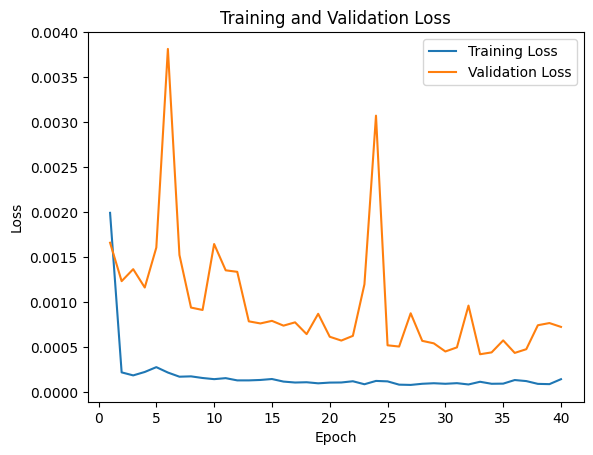

In [13]:
y3_pred = model3.predict(X_test)
y3_pred = scaler.inverse_transform(y3_pred)
y_test = scaler.inverse_transform(y_test)
rmse = np.sqrt(((y_test - y3_pred)**2).mean())
rmse# Lấy các giá trị loss và accuracy từ đối tượng history của model3
train_loss3 = history3.history['loss']

# In ra giá trị loss của epoch cuối cùng
print("Final Training Loss:", train_loss3[-1])

train_loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']  

epochs_range = range(1, len(train_loss3) + 1)

plt.plot(epochs_range, train_loss3, label='Training Loss')
plt.plot(epochs_range, val_loss3, label='Validation Loss')  # Đồ thị cho loss của tập validation
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



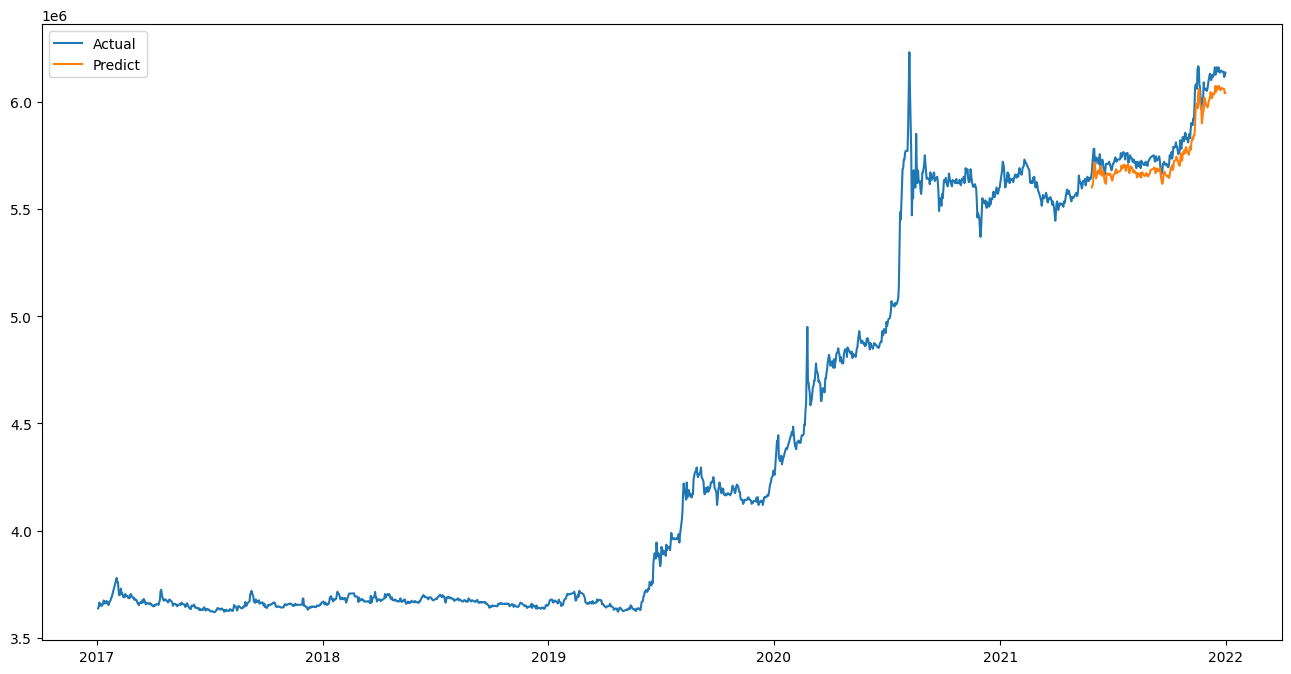

In [14]:
actual = df[['P']]
pred   = df[['P']].iloc[train_len:, :]
pred[['Predict']] = y3_pred
plt.figure(figsize=(16, 8))
plt.plot(actual, label='Actual')
plt.plot(pred[['Predict']], label='Predict')
plt.legend()
plt.show()

**SO SÁNH GIỮA 3 MODEL**
- Chỉ số RMSE ở Model 1 tốt nhất: 
    - Model 1: 26939.34595319844
    - Model 2: 123770.50273276844
    - Model 3: 69672.8903588046

- Biểu đồ Loss
    - Biểu đồ Loss ở model 1 tuy có sự biến thiên nhưng nhìn chung vẫn không ảnh hưởng nhiều, vẫn có hội tụ
    - Biểu đồ Loss ở model 2 không thể hội tụ được vì nhiều lý do
        - Bộ tham số không phù hợp, nhiều neurons dẫn đến overfitting
    - Biểu đồ Loss ở model 3: nhìn chung có sự hội tụ hơn so với model 2, nhưng vẫn còn bị biến thiên ở validation loss khá nhiều
    => cần chỉnh lại bộ tham số
- Biểu đồ dự đoán giá:
    - Model 1: kết quả khá tốt khi đường dự đoán bám gần sát với thực tế
    - Model 2: kết quả không tốt như model 1, kết quả bị hụt so với thực tế
    - Model 3: cải thiện so với model 2 nhờ áp dụng early stopping